# 3/3/20
____
Здесь будет немного инфы про систематики

In [21]:
import numpy as np
import uproot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mplhep as hep
from glob import glob
import iminuit
import probfit as pf

%matplotlib inline

sns.set(rc={'figure.figsize':(13,7)}, font_scale=1.7)
plt.style.use('seaborn-whitegrid')

def my_style(title='', xtitle='', ytitle='', gridstyle=':'):
    plt.grid(linestyle=gridstyle)
    plt.title(title)
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)

Я подготовил 11 год, поэтому буду разбираться с ним

In [14]:
def prepare_df(path='../../outputs/11/trees_sys/*.root'):
    trees = uproot.pandas.iterate( path, treepath='t')
    return pd.concat([t for t in trees], ignore_index=True).query('procedure!=1')[['label', 'trigger', 'mass']]

In [ ]:
def get_events(df)

In [11]:
trees = uproot.pandas.iterate('../../outputs/11/trees/*.root', treepath='t')

In [17]:
exp_df = prepare_df('../../outputs/11/trees/*.root')
exp_df_sys = prepare_df('../../outputs/11/trees_sys/*.root')

mc_df = prepare_df('../../outputs/model_old_v6/trees/*.root')
mc_df_sys = prepare_df('../../outputs/model_old_v6/trees_sys/*.root')

In [104]:
#гаусс + гаусс
def gauss2(x, mu, sigma1, sigma2, f):
    return f*pf.gaussian(x, mu, sigma1) + (1-f)*pf.gaussian(x, mu, sigma2)
def const(x):
    return 1

mass_bound=(470,530)
norm_sig = pf.rename( pf.Normalized( gauss2, mass_bound ), ['x', 'M', 'S1', 'S2', 'f'] )
norm_bkg = pf.rename( pf.Normalized( const, mass_bound ), ['x'] )

ext_sig = pf.Extended(norm_sig, extname='Nsig')
ext_bkg = pf.Extended(norm_bkg, extname='Nbkg')

pdf = pf.AddPdf(ext_sig, ext_bkg)

limits = {
    "limit_M": [494, 502],
    "limit_S1": [1, 15],
    "limit_S2": [5, 25],
    "limit_Nsig": [1, 100000],
    "limit_Nbkg": [0, 500],
    "limit_f": [0, 1],
}
pf.describe(pdf)

['x', 'M', 'S1', 'S2', 'f', 'Nsig', 'Nbkg']

In [96]:
def fitter(dic, nbins, limits):
    likelihood = pf.UnbinnedLH(pdf, dic, extended=True, extended_bound=mass_bound)
    initial_par_values = {"M": 497.6, "S1": 4.26, "Nsig": 7000, "Nbkg": 100, "S2":17, 'f':0.5}  
    mt = iminuit.Minuit(likelihood, **initial_par_values, **limits, pedantic=False)
    mt.migrad();
    
    likelihood.draw(minuit=mt, bins=nbins, bound=mass_bound)
    return mt, likelihood

(<iminuit._libiminuit.Minuit at 0x56329e292720>,
 <probfit.costfunc.UnbinnedLH at 0x7f269d87a8d0>)

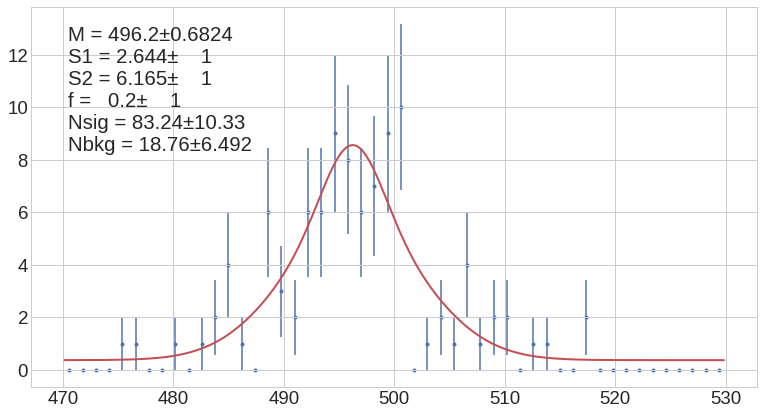

In [106]:
dicx = exp_df.query('label==600').mass.values
limits2 = limits.copy()
limits2['limit_f'] = [0.2, 0.2]
limits2['limit_S1'] = [2.644, 2.644]
limits2['limit_S2'] = [6.165, 6.165]
fitter(dicx, 50, limits2)

(<iminuit._libiminuit.Minuit at 0x56329ebe7180>,
 <probfit.costfunc.UnbinnedLH at 0x7f269deedad0>)

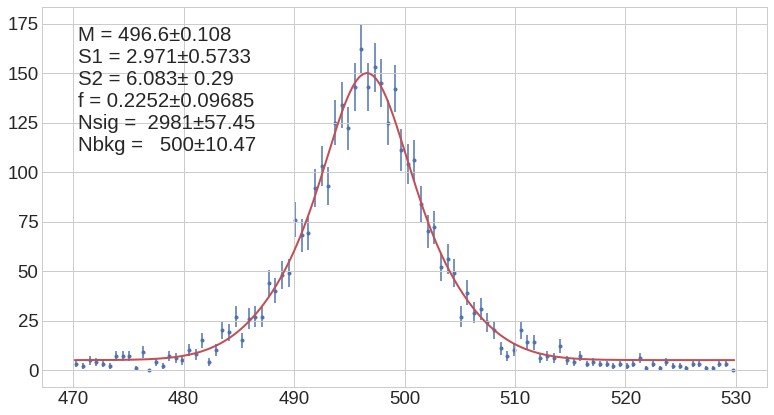

In [107]:
dicx = mc_df.query('label==575|label==550').mass.values
fitter(dicx, 100, limits)

In [19]:
for name, group in exp_df.groupby('label'):
    print(name)

525.0
537.5
550.0
562.5
575.0
587.5
600.0
612.5
625.0
637.5
650.0
662.5
675.0
687.5
700.0
712.5
725.0
737.5
750.0
762.5
775.0
787.5
800.0
812.5
825.0
837.5
850.0
862.5
875.0
887.5
900.0
912.5
925.0
935.0
945.0
950.0
962.5
975.0
987.5
1000.0
